In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Squashed Gaussian distribution

(-1, 2)

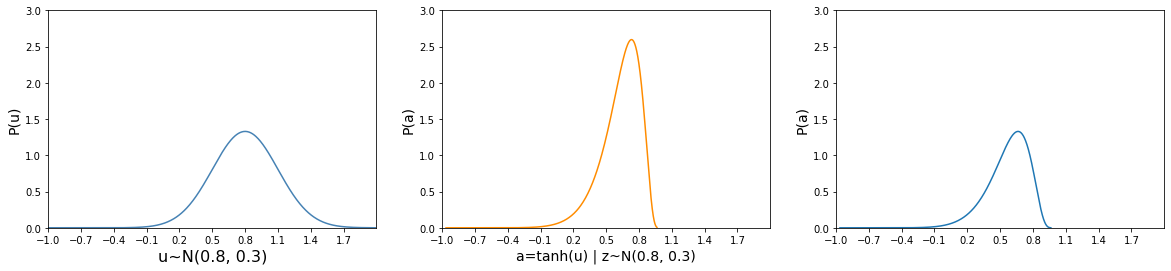

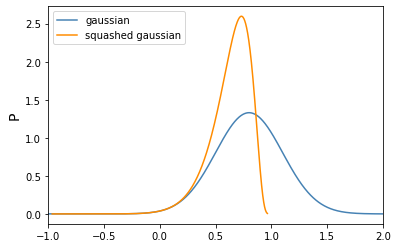

In [61]:

def compute_pdf(x, mu, std):
    """ gauss dist pdf 
    """
    logprob = - 0.5 * np.log(2*np.pi)
    logprob += - np.log(std)
    logprob += - 0.5 * ((x - mu) / std)**2
    return logprob


mu = 0.8
sigma= 0.3


z = np.random.normal(mu ,sigma, 5000)
z = np.linspace(-2,2,1000)
logp_z = compute_pdf(z, mu, sigma)
p_z = np.exp(logp_z)

logp_a = logp_z - np.log(1 - np.tanh(z)**2)
p_a = np.exp(logp_a)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,4))

ax1.plot(z, p_z, color="steelblue")
ax1.set_xlabel(f"u~N({mu}, {sigma})", fontsize=16)
ax1.set_ylabel("P(u)", fontsize=14)
ax1.set_xlim(-1,2)
ax1.set_ylim(0,3)
ax1.set_xticks(np.arange(-1,2,0.3))

ax2.plot(np.tanh(z), p_a, color="darkorange")
ax2.set_xlabel(f"a=tanh(u) | z~N({mu}, {sigma})", fontsize=14)
ax2.set_ylabel("P(a)", fontsize=14)
ax2.set_xlim(-1,2)
ax2.set_ylim(0,3)
ax2.set_xticks(np.arange(-1,2,0.3))

#: まっとうに z = arctanh(a) をガウス分布の確率密度関数に代入しても同じような形状になる
#: これは a = tanh(z) が 1 対 1 写像であるので成立する
a = np.tanh(z)
ax3.plot(np.tanh(z), np.exp(compute_pdf(0.5 * np.log((1+a)/(1-a)), mu, sigma)))
ax3.set_ylabel("P(a)", fontsize=14)
ax3.set_xlim(-1,2)
ax3.set_ylim(0,3)
ax3.set_xticks(np.arange(-1,2,0.3))

plt.figure()
plt.plot(z, p_z, color="steelblue", label="gaussian")
plt.plot(np.tanh(z), p_a, color="darkorange", label="squashed gaussian")
plt.ylabel("P", fontsize=14)
plt.legend()
plt.xlim(-1,2)


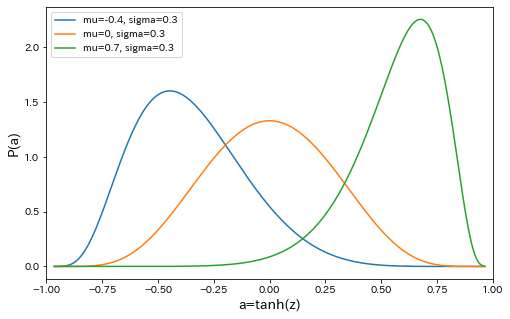

In [99]:
plt.figure(figsize=(8,5))

for mu in [-0.4, 0, 0.7]:
    
    sigma= 0.3

    z = np.linspace(-2, 2, 3000)
    logp_z = compute_pdf(z, mu, sigma)
    p_z = np.exp(logp_z)

    logp_a = logp_z - np.log(1 - np.tanh(z)**2)
    p_a = np.exp(logp_a)

    plt.plot(np.tanh(z), p_a,  label=f"mu={mu}, sigma={sigma}")
    plt.xlabel(f"a=tanh(z)", fontsize=14)
    plt.ylabel("P(a)", fontsize=14)
    plt.legend()
    plt.xlim(-1,1)


## Reparameterization

Text(0.5, 1.0, 'μ+σz')

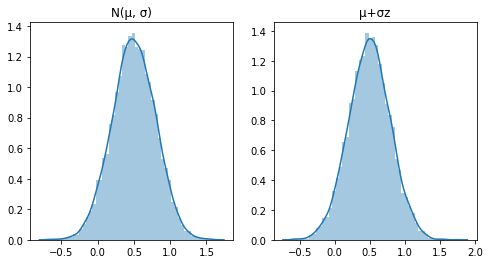

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MU = 0.5
SIGMA = 0.3
N = 10000

#: 正規分布モジュールからサンプリング
p1 = np.random.normal(MU, SIGMA, size=N)

#: 標準正規分布ノイズから生成
mu = np.zeros(N).reshape(-1, 1) + MU
noise = np.random.normal(0, 1, size=N).reshape(-1, 1)
p2 = mu + SIGMA * noise

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.distplot(p1, ax=ax1)
ax1.set_title("N(μ, σ)")

sns.distplot(p2, ax=ax2)
ax2.set_title("μ+σz")

In [55]:
arr = np.arange(15).reshape(5, 3)

tf.random.normal(shape=arr.shape, mean=0., stddev=1.)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.0196885 ,  1.3002034 ,  1.2800992 ],
       [ 1.4537534 , -1.4910587 , -0.29789487],
       [-0.46980473, -1.7028155 , -0.7581651 ],
       [-1.2065604 , -1.4266262 , -0.7726881 ],
       [ 0.11585607,  0.05554914,  0.41831028]], dtype=float32)>

In [69]:
def _compute_logprob(means, stdevs, actions):
    logprob = - 0.5 * np.log(2*np.pi)
    logprob += - tf.math.log(stdevs)
    logprob += - 0.5 * tf.square((actions - means) / stdevs)
    #logprob = tf.reduce_sum(logprob, axis=1, keepdims=True)
    return logprob

logprob = _compute_logprob(np.array([0.5]), np.array([0.3]), np.array([0.9]))
logprob

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-0.60385462])>

In [68]:
import tensorflow_probability as tfp
normal = tfp.distributions.Normal(0.5, scale=0.3)
normal.log_prob(0.9)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.6038543>

In [63]:
t = 0.8
0.5 * np.log((1+t)/(1-t))

1.0986122886681098